<a href="https://colab.research.google.com/github/DeepakMupparapu/hds5210-2023/blob/main/week12/week12_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [3]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')
condemnations.shape

<ipython-input-3-0a26a9c06fde>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')


(32586, 40)

In [10]:
import pandas as pd

# You can load the data into a DataFrame
condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')

# Convert 'InspectDate' to datetime format if it's not already
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])

# Filter the DataFrame for the desired date range
condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') & (condemnations['InspectDate'] <= '2014-12-31')]

# Now 'condemnations' contains only the data between 1986 and 2014
print(condemnations.shape)


(30232, 40)


<ipython-input-10-7529218dd0c2>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')


In [11]:
print(condemnations.head)

<bound method NDFrame.head of        AcctNum  PrclErr AddrAdjusted  CityBlock  Parcel  OwnerCode  \
0          1.0      0.0        False    3652.00   341.0        1.0   
1          2.0      0.0        False     666.00    80.0        0.0   
2          3.0      0.0        False    3913.01   120.0        1.0   
3          4.0      2.0        False    3744.00   145.0        0.0   
4          5.0      0.0        False    1103.00    30.0        0.0   
...        ...      ...          ...        ...     ...        ...   
32575      NaN      NaN          NaN        NaN     NaN        NaN   
32576      NaN      NaN          NaN        NaN     NaN        NaN   
32581      NaN      NaN          NaN        NaN     NaN        NaN   
32582      NaN      NaN          NaN        NaN     NaN        NaN   
32585      NaN      NaN          NaN        NaN     NaN        NaN   

             Handle      Parcel9 AddrNum AddrSuf  ... CensBlock00 AsrNbrhd  \
0      1.365200e+10  365200341.0    4049          .

<ipython-input-11-31fbbc831c65>:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(condemnations.head)


In [7]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [13]:
import pandas as pd
import numpy as np

# Assuming you have a CSV file named 'https://hds5210-data.s3.amazonaws.com/condemn.txt.csv'
condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')

# Convert 'InspectDate' to datetime format
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])

# Filter the DataFrame for the desired date range
condemnations = condemnations[(condemnations['InspectDate'] >= '1986') & (condemnations['InspectDate'] < '2015')]

# Add a 'Count' column with value 1 for each row
condemnations['Count'] = 1

# Create a pivot table
by_year = condemnations.pivot_table(values='Count', index=condemnations['InspectDate'].dt.year, columns='Status', aggfunc=np.sum, fill_value=0)

# Reorder columns
by_year = by_year[['B', 'L', 'R', 'W']]

# Display the first few rows of the resulting DataFrame
by_year.head()


<ipython-input-13-8f3c6fec2f8c>:5: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')


Status,B,L,R,W
InspectDate,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322


In [15]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


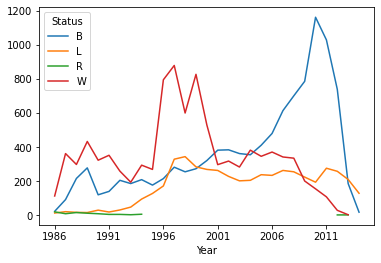

In [ ]:
%matplotlib inline
by_year.plot()

---

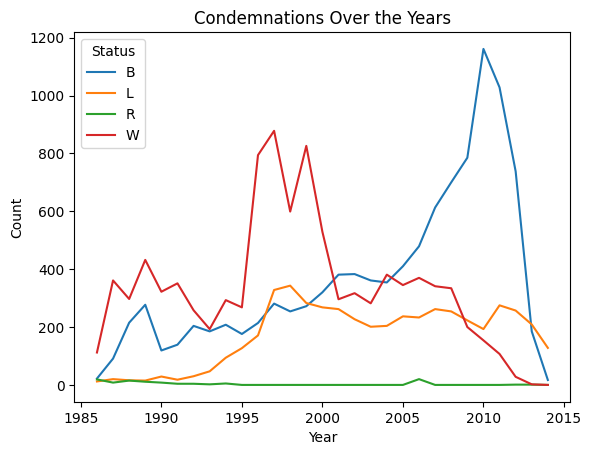

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

by_year.plot()

plt.title('Condemnations Over the Years')  # Set the title of the plot
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis

plt.legend(title='Status')

plt.show()


In [24]:
#The chart I have created shows how the number of condemnations  has changed over the years From 1986 to 2014. There are different lines on the chart, each representing a different Type of problem ('B', 'L', 'R', 'W').

#If a line goes up, it means there were more problems of that Type In that year
#If a line goes down, it means there were fewer problems of that Type In that year.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.awsamazon.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [69]:
# import pandas as pd

# Read the 'meetings.csv' file from the specified URL into a DataFrame
meetings = pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')

# Convert 'startTime' and 'endTime' columns to datetime format
meetings['startTime'] = pd.to_datetime(meetings['startTime'])
meetings['endTime'] = pd.to_datetime(meetings['endTime'])

# Extract the date part from 'startTime' and create a new 'startDate' column
meetings['startDate'] = meetings['startTime'].dt.strftime('%Y-%m-%d')

# Categorize meetings into two weeks: 'BEFORE' and 'DURING'
meetings.loc[(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28'), 'Week'] = 'BEFORE'
meetings.loc[(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27'), 'Week'] = 'DURING'


In [70]:
summary = meetings.pivot_table(index='userName', columns='Week', aggfunc='size', fill_value=0)

summary['pctChange'] = ((summary['DURING'] - summary['BEFORE']) / summary['BEFORE'])

summary.columns = ['Before', 'During', 'pctChange']

print(summary)

                                Before  During  pctChange
userName                                                 
Drew.Marco                          12      19   0.583333
amit.bhagat                         17      30   0.764706
andrea.bryant.amitechsolutions       5       3  -0.400000
angie.warren                         5       9   0.800000
chris.rogers.amitechsolutions        4       3  -0.250000
eric.keeney                         15      27   0.800000
eric.rodman                          4      12   2.000000
jeff.hatfield.amitechsolutions      13      26   1.000000
jennifer.patton.amitechs             5       7   0.400000
jessica.sikora                       3       7   1.333333
matt.allsup                          5       0  -1.000000
matt.brown.amitechsolutions          1       2   1.000000
melissa.menne                       10       9  -0.100000
michael.demos                        5      11   1.200000
paul.boal                           15      35   1.333333
paul.smith.ami

---

In [71]:
assert(len(summary) == 22)

In [72]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
